(28, 28)
784
Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.2895 - accuracy: 0.9117 - val_loss: 0.1442 - val_accuracy: 0.9537
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.1069 - val_accuracy: 0.9670
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0808 - val_accuracy: 0.9747
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.1038 - val_accuracy: 0.9677
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0649 - val_accuracy: 0.9785
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0629 - val_accuracy: 0.9818
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0816 - val_acc

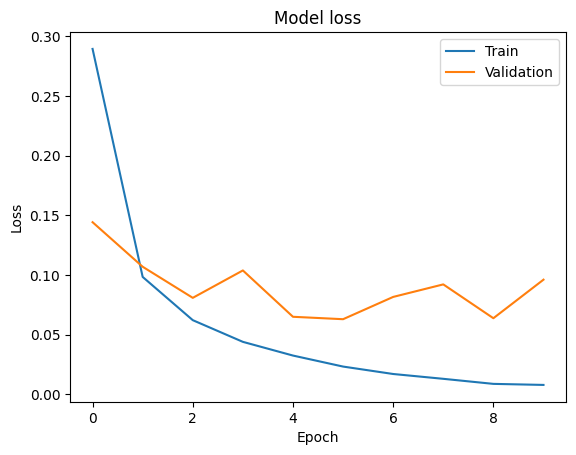

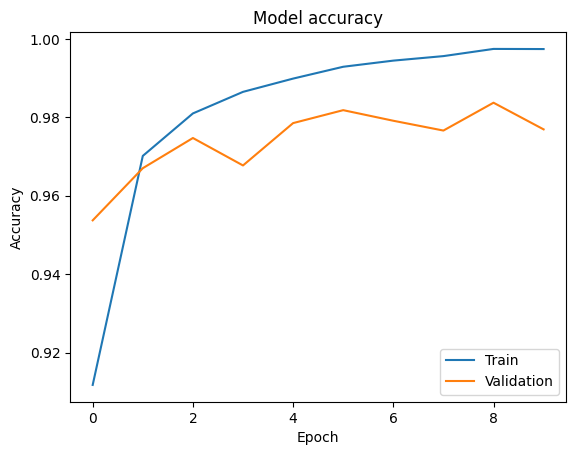

In [2]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
import matplotlib.pyplot as plt
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()







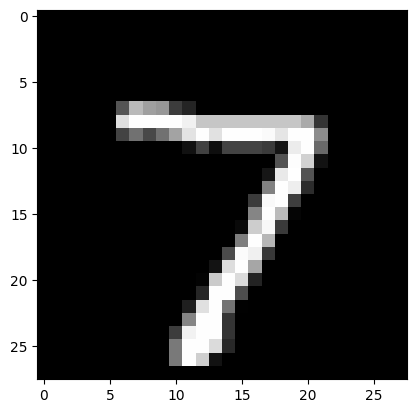

1/1 [==============================] - 0s 99ms/step
Prediction:  7


In [3]:
# choose an image from the test data
img_index = 0

# plot the image
plt.imshow(test_images[img_index], cmap='gray')
plt.show()

# make a prediction
img = test_data[img_index]
prediction = model.predict(np.array([img]))
print("Prediction: ", np.argmax(prediction))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.2914 - accuracy: 0.9099 - val_loss: 0.1359 - val_accuracy: 0.9580
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1003 - accuracy: 0.9688 - val_loss: 0.0858 - val_accuracy: 0.9730
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0629 - accuracy: 0.9800 - val_loss: 0.1561 - val_accuracy: 0.9507
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0624 - val_accuracy: 0.9800
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0533 - val_accuracy: 0.9847
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0680 - val_accuracy: 0.9800
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0631 - val_accu

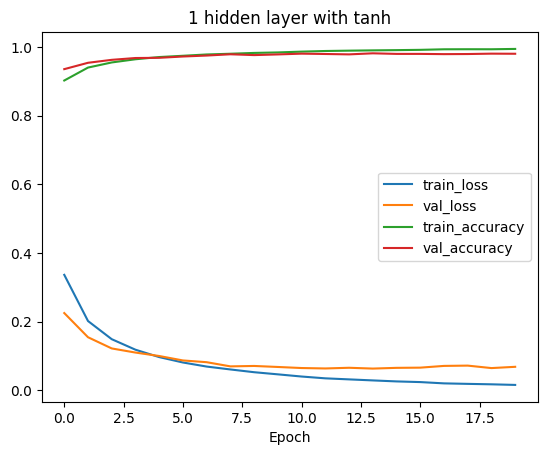

1 hidden layer with tanh - Test loss: 0.0688, Test accuracy: 0.9805


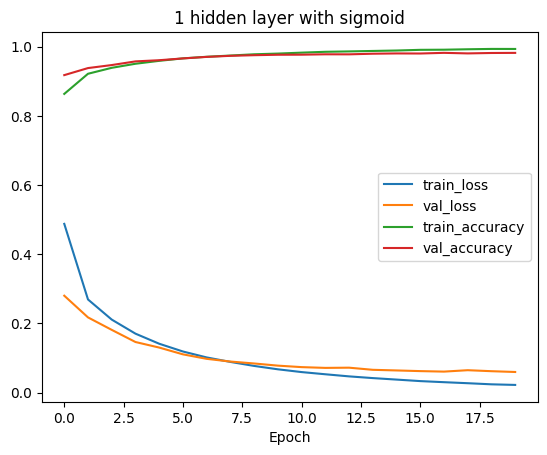

1 hidden layer with sigmoid - Test loss: 0.0595, Test accuracy: 0.9819


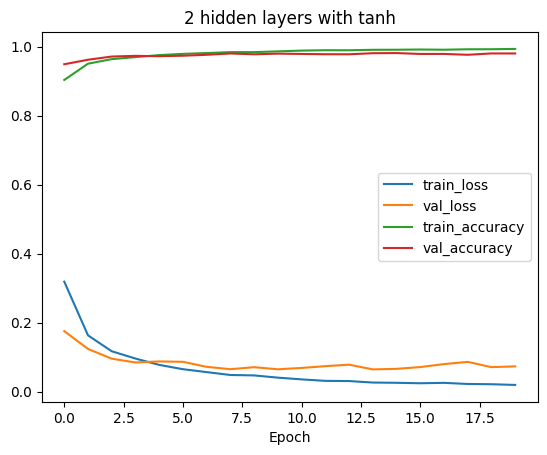

2 hidden layers with tanh - Test loss: 0.0730, Test accuracy: 0.9802


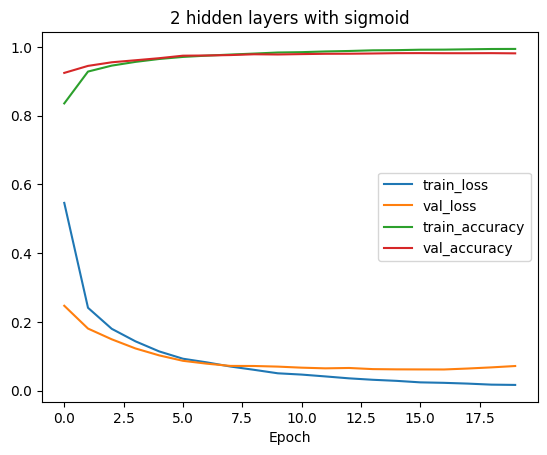

2 hidden layers with sigmoid - Test loss: 0.0715, Test accuracy: 0.9814


In [6]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))

In [7]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
   
    
    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.2889 - accuracy: 0.9109 - val_loss: 0.1638 - val_accuracy: 0.9460
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0998 - accuracy: 0.9692 - val_loss: 0.0881 - val_accuracy: 0.9726
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0622 - accuracy: 0.9802 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0932 - val_accuracy: 0.9727
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0725 - val_accuracy: 0.9793
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0576 - val_accuracy: 0.9836
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0599 - val_acc